### 1. Setup

In [74]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# 1. Loads the file into a DataFrame
nyc_flights = pd.read_csv("./Downloads/nycflights13.csv.bz2", sep="\t")
nyc_flights.shape

(336776, 19)

In [204]:
# 2. Checks all the variables
nyc_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'total_delay', 'season', 'period_day'],
      dtype='object')

In [77]:
nyc_flights.head(7)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z


### 2. Data Exploration

In [78]:
# Number of flights out of NYC in 2013
nyc_flights[nyc_flights['year'] == 2013].count()[0]

336776

1. In 2013, there were 336776 flights out of NYC.

In [79]:
# Number of NYC airports in the data frame
nyc_flights.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [80]:
nyc_flights.origin.nunique()

3

2. There are 3 NYC airports in this data: Newark International Airport (EWR), LaGuardia Airport (LGA), and John F. Kennedy International Airport (JFK).

In [81]:
nyc_flights[nyc_flights.year == 2013].dest.nunique()

105

3. Airplanes leaving NYC made their way to 105 different airports in 2013.

In [82]:
nyc_flights[nyc_flights.dest == 'SEA'].count()['dest']

3923

4. There was a total of 3923 flights from NYC to Seattle.

In [83]:
nyc_flights[nyc_flights.dest == 'GEG'].count()['dest']

0

5. Surprisingly (or maybe not), there were no flights from NYC to Spokane (GEG)!

In [84]:
# Check if there are any destinations with invalid airport codes.
# The code for the regex operation was based on this one from StackOverflow:
# https://stackoverflow.com/questions/7090717/regular-expression-to-match-3-capital-letters-followed-by-a-small-letter-followe
nyc_flights[nyc_flights['year'] == 2013].count()[0] - len(nyc_flights.dest.str.match(pat = r'\b[A-Z]{3}\b'))

0

In [85]:
nyc_flights.dest.isnull().sum()

0

6. There are no destinations that do not look like valid airport codes and no missing destination codes.

7. I was able to answer all the questions, and they are all well defined! The data seems very complete so far, with a low amount of null values for some categories.

### 3. Flights are delayed...

In [86]:
# Typical delay of flights
round((nyc_flights.dep_delay + nyc_flights.arr_delay).mean(), 2)

19.45

1. The average delay of flights in this data frame is of 19.45 minutes.

Let's check if our 'delay' data is good:

In [87]:
nyc_flights['arr_delay'].dtypes

dtype('float64')

In [88]:
nyc_flights['dep_delay'].dtypes

dtype('float64')

In [89]:
nyc_flights['dep_delay'].isna().sum()

8255

In [90]:
nyc_flights['arr_delay'].isna().sum()

9430

In [192]:
round(nyc_flights['arr_delay'].isna().sum() / nyc_flights['arr_delay'].count() * 100, 2)

2.88

In [191]:
round(nyc_flights['dep_delay'].isna().sum() / nyc_flights['dep_delay'].count() * 100, 2)

2.513

2. Both our 'delay' variables are of _float_ data type, therefore there should be no invalid entries. Besides, the ratio of missing data to the total amount of data we have for both these variables is minimal, so they are great!

In [93]:
nyc_flights['total_delay'] = nyc_flights['arr_delay'] + nyc_flights['dep_delay']

I decided to create a new column which is the sum of the arrival delay and the departure delay to make computation easier.
I'll call it _total_delay_.

In [94]:
# A look on our data frame with this change
nyc_flights.head(7)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,13.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,24.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,35.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,-19.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,-31.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z,8.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z,14.0


In [95]:
nyc_flights.groupby('dest').size().sort_values(ascending=False).head(10)

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
dtype: int64

In [96]:
nyc_flights.groupby(['dest']).total_delay.mean().sort_values(ascending=False).head(3)

dest
CAE    75.575472
TUL    68.547619
OKC    59.800000
Name: total_delay, dtype: float64

3. The three worst destinations in terms of the longest typical delay are Columbia Metropolitan Airport (CAE), Tulsa International Airport (TUL), and Will Rogers World Airport (OKC).

Now, let's analyse a possible correlation between the season of the year and the delay on flights:

In [97]:
# Function that creates a new column with the season of the year that a flight occurred.
# Based on: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
def season(row):
    if row['month'] in [12, 1, 2]:
        val = 'winter'
    elif row['month'] in [3, 4, 5]:
        val = 'spring'
    elif row['month'] in [6, 7, 8]:
        val = 'summer'
    elif row['month'] in [9, 10, 11]:
        val = 'autumn'
    else:
        val = -1
    return val

In [98]:
# Applies the function to our data frame
nyc_flights['season'] = nyc_flights.apply(season, axis=1)

In [99]:
# Quick glance at the distribution of information in our new column
nyc_flights.season.value_counts()

summer    86995
spring    85960
autumn    83731
winter    80090
Name: season, dtype: int64

There is a very similar amount of flights during each season of the year.

In [100]:
nyc_flights.groupby(['season']).total_delay.mean().sort_values(ascending=False).head()

season
summer    31.195628
winter    21.539290
spring    20.106945
autumn     4.876367
Name: total_delay, dtype: float64

Text(0.5, 1, 'Total delay on flights on each season')

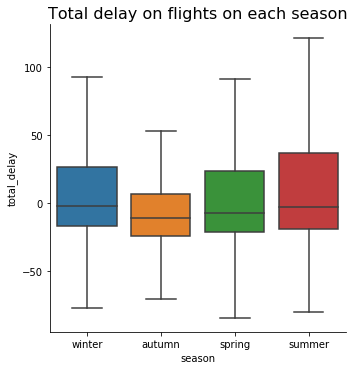

In [101]:
# Box plot of our data. The 'showfliers' argument equals to False to exclude outliers
sns.catplot(x='season', y='total_delay', data=nyc_flights, kind='box', showfliers=False)
plt.title('Total delay on flights on each season', fontsize=16)

4. As we can see from both the table and the graph above, Autumn quarter experiences the least delay in flights, whereas Summer tends to experience the most. The median delay is very similar for all four quarters though.

In [102]:
# Function that creates a new column with the period of the day that a flight occurred.
# Based on: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
def period_day(row):
    if row['hour'] < 6:
        val = 'early morning'
    elif row['hour'] < 12:
        val = 'morning'
    elif row['hour'] < 18:
        val = 'afternoon'
    elif row['hour'] < 24:
        val = 'night'
    else:
        val = -1
    return val

In [103]:
# Applies the function to our data frame
nyc_flights['period_day'] = nyc_flights.apply(period_day, axis=1)

In [104]:
# Quick glance at the distribution of information in our new column
nyc_flights.period_day.value_counts()

afternoon        131159
morning          129067
night             74596
early morning      1954
Name: period_day, dtype: int64

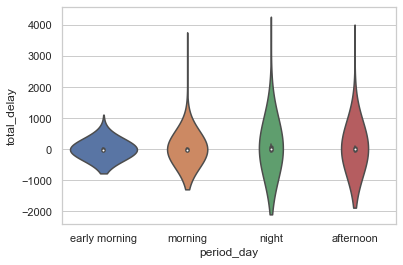

In [124]:
sns.set(style="whitegrid")
sns.violinplot(x='period_day', y='total_delay', data=nyc_flights, bw=10)

5. From the violin plot above, we can see that both the early morning and morning periods experience least delay. On the other hand, flights in the afternoon and during the night tend to experience higher delays.

So if you want to avoid any stress, being in the airport early might be the best alternative!

6. One of the problems I had with the questions/answers was to choose a graph that efficiently showed the information I wanted to present. The box plot and violin plot seemed like great options for a categorical and numerical variables graph!

### 4. San Diego!

In [130]:
# Reduced data set that only contains flights from NYC to San Diego (SAN)
nyc_san_flights = nyc_flights[nyc_flights['dest'] == 'SAN']

In [164]:
# Brief look at our reduced data set
nyc_san_flights.head(7)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,total_delay,season,period_day
128,2013,1,1,821.0,820,1.0,1153.0,1129,24.0,B6,...,JFK,SAN,354.0,2446,8,20,2013-01-01T13:00:00Z,25.0,winter,morning
155,2013,1,1,851.0,840,11.0,1215.0,1206,9.0,UA,...,EWR,SAN,367.0,2425,8,40,2013-01-01T13:00:00Z,20.0,winter,morning
492,2013,1,1,1542.0,1545,-3.0,1852.0,1913,-21.0,DL,...,JFK,SAN,342.0,2446,15,45,2013-01-01T20:00:00Z,-24.0,winter,afternoon
550,2013,1,1,1631.0,1630,1.0,1935.0,1950,-15.0,UA,...,EWR,SAN,346.0,2425,16,30,2013-01-01T21:00:00Z,-14.0,winter,afternoon
564,2013,1,1,1651.0,1650,1.0,2000.0,2004,-4.0,B6,...,JFK,SAN,349.0,2446,16,50,2013-01-01T21:00:00Z,-3.0,winter,afternoon
603,2013,1,1,1727.0,1725,2.0,2043.0,2040,3.0,AA,...,JFK,SAN,357.0,2446,17,25,2013-01-01T22:00:00Z,5.0,winter,afternoon
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,...,EWR,SAN,NaN,2425,17,38,2013-01-01T22:00:00Z,NaN,winter,afternoon


In [135]:
nyc_san_flights[nyc_san_flights.year == 2013].shape[0]

2737

1. In 2013, there were 2737 flights from NYC to San Diego.

In [141]:
nyc_san_flights.carrier.nunique()

4

In [142]:
nyc_san_flights.carrier.unique()

array(['B6', 'UA', 'DL', 'AA'], dtype=object)

2. A total of 4 airlines flew from NYC to San Diego 
3. These are: JetBlue (B6), United Airlines (UA), Delta (DL), and American Airlines (AA).

In [144]:
nyc_san_flights.carrier.value_counts()

UA    1134
B6     663
DL     575
AA     365
Name: carrier, dtype: int64

Their number of flights were the following:
- United Airlines (UA): 1134
- JetBlue (B6): 663
- Delta (DL): 575
- American Airlines (AA): 365

In [148]:
# The 'tailnum' variable stores the plane's tail number, which is its identifier.
nyc_san_flights.tailnum.nunique()

761

4. As we can see from the data, 761 unique planes flew from NYC to San Diego.

In [161]:
nyc_san_flights.groupby('origin').tailnum.nunique().sort_values(ascending=False)

origin
JFK    397
EWR    364
Name: tailnum, dtype: int64

5. In total, 397 planes arrived in San Diego from JFK, 364 from EWR and 0 from LGA.

In [176]:
round((nyc_san_flights.air_time).mean(), 2)

325.53

In [177]:
(nyc_san_flights.air_time).agg(['max', 'min'])

max    413.0
min    279.0
Name: air_time, dtype: float64

6. The average flight duration to San Diego was of 325.53 minutes, or about 5 hours and 25 minutes. This result is not the same as the one in flight schedules, as most flights from New York take **at least** 6 hours and 15 minutes to reach San Diego. 

One hypothesis is that this data set does **not** account for the change in **time zones**. San Diego is in the Pacific Standard Time (GMT-8) whereas New York is in the Eastern Standard Time (GMT -5). Therefore, adding the 3 hours of difference in time zone, we could get an average flight duration of 8 hours and 25 minutes.

The slowest flight took 413 hours and the fastest arrived in San Diego 279 hours before departure time.

In [193]:
round((nyc_san_flights[nyc_san_flights.arr_delay > 15].shape[0] / nyc_san_flights.shape[0]) * 100, 2)

23.31

7. Another interesting statistic from our data set: about 23% of all flights from New York to San Diego got delayed at **arrival** by _more than_ 15 minutes.

In [200]:
round(nyc_san_flights[(nyc_san_flights.origin == 'JFK') & (nyc_san_flights.arr_delay > 15)].shape[0] / nyc_san_flights[nyc_san_flights.origin == 'JFK'].shape[0] * 100, 2)

23.46

In [201]:
round(nyc_san_flights[(nyc_san_flights.origin == 'EWR') & (nyc_san_flights.arr_delay > 15)].shape[0] / nyc_san_flights[nyc_san_flights.origin == 'EWR'].shape[0] * 100, 2)

23.1

In [205]:
# This would result in a ZeroDivisionError as we do not have data of flights from LGA to SAN in this data set.

# round(nyc_san_flights[(nyc_san_flights.origin == 'LGA') & (nyc_san_flights.arr_delay > 15)].shape[0] / nyc_san_flights[nyc_san_flights.origin == 'LGA'].shape[0] * 100, 2)

8. It seems that flights leaving from either the JFK or EWR airports faced very similar arrival delays. There is **not** a considerable disparity between the two airports in this category.

### 5. What are these planes?

In [207]:
# Loads the data set
planes = pd.read_csv("./Downloads/planes.csv.bz2", sep="\t")

In [209]:
planes.columns

Index(['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine'],
      dtype='object')

In [210]:
planes.shape[0]

3322

1. There are 3322 planes in total, and the variables are: 'tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', speed', 'engine'.

2. Both data sets ('flights' and 'planes') have the **'tailnum'** variable in common. Therefore, we shall use it as the _merge key_ for these data sets.

In [231]:
nyc_san_flights_planes = pd.merge(nyc_san_flights, planes, on='tailnum', how='inner')

In [232]:
nyc_san_flights_planes.head(7)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,season,period_day,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,821.0,820,1.0,1153.0,1129,24.0,B6,...,winter,morning,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
1,2013,12,26,858.0,900,-2.0,1158.0,1210,-12.0,B6,...,winter,morning,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
2,2013,2,20,907.0,825,42.0,1233.0,1133,60.0,B6,...,winter,morning,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
3,2013,2,21,1703.0,1645,18.0,2009.0,2000,9.0,B6,...,winter,afternoon,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
4,2013,5,20,1657.0,1640,17.0,1939.0,1956,-17.0,B6,...,spring,afternoon,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
5,2013,8,5,1709.0,1635,34.0,1934.0,1938,-4.0,B6,...,summer,afternoon,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan
6,2013,9,26,1651.0,1651,0.0,1931.0,1957,-26.0,B6,...,autumn,afternoon,2001.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NaN,Turbo-fan


In [233]:
nyc_san_flights_planes.shape[0]

2363

3. I used an **inner merge** as the new data set will only cntain the common values in both the left and right dataframes. Therefore we avoid some null values.

As we can see, we have 2363 rows with available data.

In [219]:
# To use some more complex RegEx functions, let's import its Python library:
import re

In [220]:
airbus_320 = re.compile('A318|A319|A320|A321')
boeing_373 = re.compile('737')

4. Airbus 320-series VS Boeing 737 planes

In [234]:
nyc_san_flights_planes.seats.isnull().sum()

0

5. By inner merging both data sets, we ended up **not having any rows** without data about the number of seats in the plane.

In [238]:
# We can find out the index of the largest plane in terms of seats with the idxmax() function
# Credits: https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe
nyc_san_flights_planes.seats.idxmax()

207

In [241]:
nyc_san_flights_planes.loc[207, ['seats', 'manufacturer', 'model']]

seats               330
manufacturer     BOEING
model           767-323
Name: 207, dtype: object

6. The largest airplane is a Boeing 767-323, containing 330 seats.

In [242]:
nyc_san_flights_planes.groupby('origin').seats.median()

origin
EWR    178
JFK    200
Name: seats, dtype: int64

7. The median number of seats of planes going to San Diego from the EWR airport is 178, and from JFK it's 200.

### 6. Reflections

1. One issue I had with the data was deciding which type of _merge_ to use. I believe this is an important topic to go deeper into during lecture.

2. No ethical concerns, we did not reveal personal information about any of the passengers nor the companies.

3. These questions can be answered and can be used by the airports and the flight companies for business analytics. Besides, of course, it can be used to teach beginner students into the field of Data Science!